<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h4 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment 3</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @mh_momeni  -  Question 2,3: @Mahdi_h721 </font> </h5>


You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

##  Q1. Implementing QR Factorization <sub><sup>``(40 pt.)``</sup></sub>

>In this question, we are going to use QR factorization in computing eigenvalues. It is an important building block in numerical linear algebra. Recall that for any matrix $A$
, $A=QR$
 where $Q$
 is orthogonal and $R$
 is upper-triangular.

 **Reminder**: The QR algorithm, uses the QR decomposition, but don't confuse the two.

In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

In [2]:
n = 5
A = np.random.rand(n,n)
npQ, npR = np.linalg.qr(A)

Check that Q is orthogonal:


In [3]:
np.allclose(np.eye(n), npQ @ npQ.T), np.allclose(np.eye(n), npQ.T @ npQ)

(True, True)

Check that R is triangular

In [4]:
npR

array([[-1.1498, -0.8857, -0.7106, -0.7246, -1.2776],
       [ 0.    , -0.9   , -0.8304, -0.5949, -0.5302],
       [ 0.    ,  0.    , -0.4412,  0.2947, -0.0477],
       [ 0.    ,  0.    ,  0.    ,  0.5251,  0.0785],
       [ 0.    ,  0.    ,  0.    ,  0.    , -0.029 ]])

### Gram-Schmidt

#### Classical Gram-Schmidt (unstable)

For each $j$
, calculate a single projection

$$v_j=P_ja_j$$

where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

In [6]:
def cgs(A):
    m, n = A.shape
    Q = np.zeros([m,n], dtype=np.float64)
    R = np.zeros([n,n], dtype=np.float64)

    for j in range(n):
        Q[:,j] = A[:,j]
        for k in range(j):
            R[k,j] = np.dot(Q[:,k], A[:,j])
            Q[:,j] = Q[:,j] - R[k,j] * Q[:,k]
        R[j,j] = np.linalg.norm(Q[:,j])
        Q[:,j] =  Q[:,j]/R[j,j]
    return Q, R

In [7]:
Q, R = cgs(A)
np.allclose(A, Q @ R)

True

Check if Q is unitary:

In [8]:
np.allclose(np.eye(len(Q)), Q.dot(Q.T))

True

### Modified Gram-Schmidt (optional)

Classical (unstable) Gram-Schmidt: for each $j$
, calculate a single projection
$$v_j=P_ja_j$$
where $P_j$
 projects onto the space orthogonal to the span of $q_1,…,q_{j−1}$
.

Modified Gram-Schmidt: for each $j$
, calculate $j−1$
 projections
$$P_j=P_{⊥q_{j−1}⋯⊥q_2⊥q_1}$$

In [9]:
n = 3
A = np.random.rand(n,n).astype(np.float64)

In [10]:
def mgs(A):
    m, n = A.shape
    Q = np.zeros((m, n), dtype=np.float64)
    R = np.zeros((n, n), dtype=np.float64)
    Q = A.copy()

    for i in range(n):
        Q[:, i] /= np.linalg.norm(Q[:, i])
        for j in range(i + 1, n):
            Q[:, j] -= Q[:, i] @ Q[:, j] * Q[:, i]

    for i in range(n):
        for j in range(i,n):
            R[i,j]=np.sum(A[:,j] * Q[:,i])

    return Q, R

In [11]:
Q, R = mgs(A)
np.allclose(np.eye(len(Q)), Q.dot(Q.T.conj()))

True

In [12]:
np.allclose(A, np.matmul(Q,R))

True

### Classical vs Modified Gram-Schmidt

In this part, we want to construct a square matrix $A$ with random singular vectors and widely varying singular values spaced by factors of 2 between $2^{−1}$
 and $2^{−(n+1)}$

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [14]:
n = 100
U, X = np.linalg.qr(np.random.randn(n,n))   # set U to a random orthogonal matrix
V, X = np.linalg.qr(np.random.randn(n,n))   # set V to a random orthogonal matrix
S = np.diag(np.power(2,np.arange(-1,-(n+1),-1), dtype=float))  # Set S to a diagonal matrix w/ exp
                                                              # values between 2^-1 and 2^-(n+1)

In [15]:
A = np.matmul(U,np.matmul(S,V))
QC, RC = cgs(A)
QM, RM = mgs(A) # if you don't complete the mgs function, comment this line

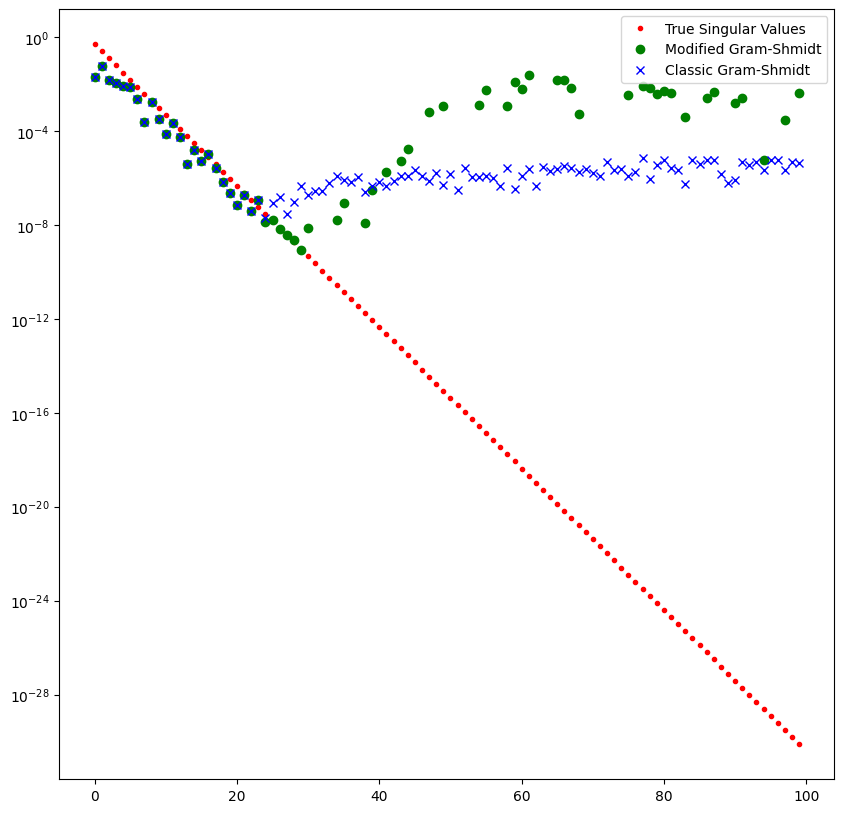

In [16]:
plt.figure(figsize=(10,10))
plt.semilogy(np.diag(S), 'r.', label="True Singular Values")
plt.semilogy(np.diag(RM), 'go', label="Modified Gram-Shmidt")
plt.semilogy(np.diag(RC), 'bx', label="Classic Gram-Shmidt")
plt.legend()
rcParams.update({'font.size': 18})

### Eigenvalue Decomposition using QR Factorization

Use the QR algorithm (or QR method) to get the eigenvalues of matrix $A$. Do 100 iterations, and print out the 1st, 5th, 10th, 20th and 100th iteration.

 **Reminder**: The QR algorithm (or QR method), uses the QR factorization, but don't confuse the two.

In [17]:
##Your Code start here
def QR_alg(A,iterations,steps):
    A0=np.copy(A)

    for i in range(iterations):
        Q,R = cgs(A0)
        A0 = R @ Q
        if i in steps:
            eig = np.diag(A0)
            eig = np.sort(eig)
            print("iteration =",i+1," :")
            print(eig)
            print()
pass
##Your Code ends here

In [18]:
A = np.array([1.0, -1.0, 0.0, 0.0, -1.0, 1.0, -1.0, 0.0, 0.0, -1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 3.0]).reshape((4, 4))
print("The matrix: \n", A)

print("\n --- Built-in ---")
print(np.linalg.eig(A)[0])
##Your Code start here
steps = [0,4,9,19,99]
QR_alg(A,100,steps)
##Your Code ends here

The matrix: 
 [[ 1. -1.  0.  0.]
 [-1.  1. -1.  0.]
 [ 0. -1.  2.  0.]
 [ 0.  0.  0.  3.]]

 --- Built-in ---
[-0.247   1.445   2.8019  3.    ]
iteration = 1  :
[0. 2. 2. 3.]

iteration = 5  :
[-0.247   1.4541  2.7929  3.    ]

iteration = 10  :
[-0.247   1.4451  2.8019  3.    ]

iteration = 20  :
[-0.247   1.445   2.8019  3.    ]

iteration = 100  :
[-0.247   1.445   2.8019  3.    ]



##  Q2. SVD & Image processing <sub><sup>``(30 pt.)``</sup></sub>

> In this question, we are going to investigate the use of SVD as a tool to obtain the basis of the matrix in digital image processing.
The first issue we will examine is image compression. For this purpose, in general, we can consider the information inside the image as a data matrix, then find a suitable basis for this information matrix and by depicting the primary matrix on the more important basis vectors and keeping the necessary information to show the initial image with less information.
This process results in image compression. It should be noted that for simplicity, the images we are examining in this exercise are in black and white.
>With the help of SVD, we can find a basis for the column space of the image matrix that we want, so that the columns of the image matrix have the highest correlation with the basis vectors.
>On the other hand, if these bases are considered in descending order of the size of the singular values, they will contain the most general information of the columns of the image, so by keeping only r initial columns of the found bases (U) along with the combined vectors (V) and the singular values (Σ) corresponding to them, we can retain the image's overall image with a good approximation.
>From an expert point of view, the reconstruction is actually a lower-order reconstruction of the primary matrix.
In this view, the value of r is the parameter to control the amount of compression we want.

###  part 1

In this part, the compression operation is performed on the input black and white image with the help of SVD analysis. One of the criteria for comparing the initial and final image is the PSNR criterion. Research about this criterion and draw the PSNR diagram in terms of different r. Then compare the results with the diagram by giving some test inputs and plotting the outputs.
One of the inputs you give to the function should be the image pic.jpg.

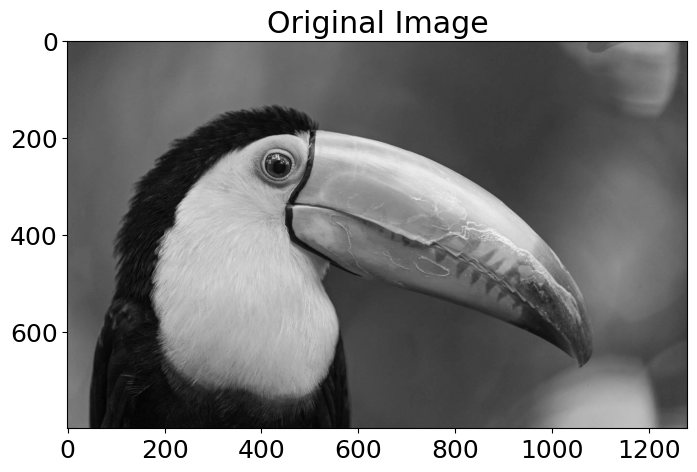

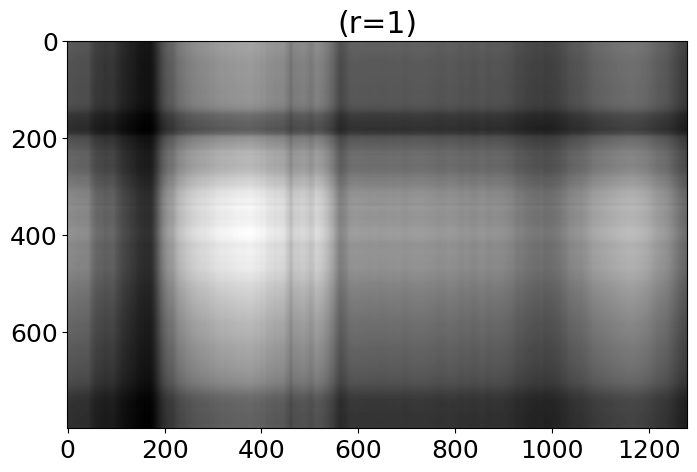

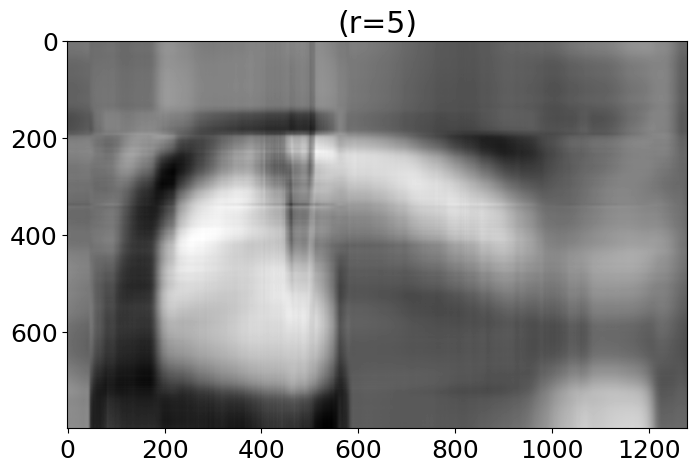

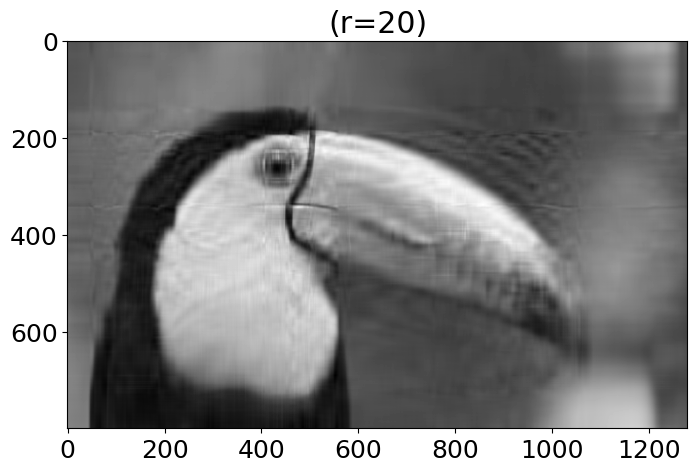

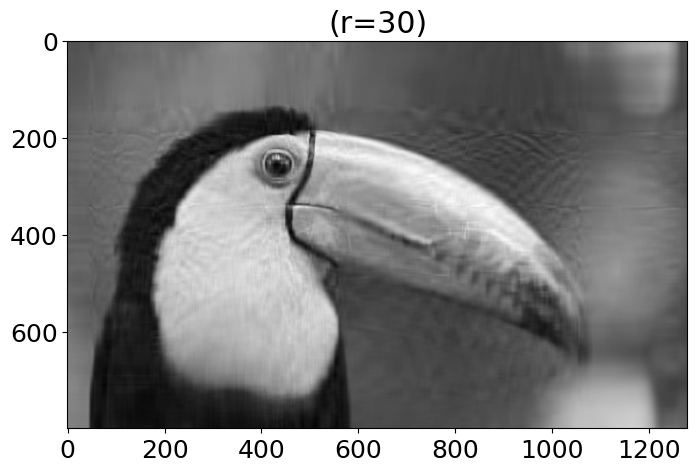

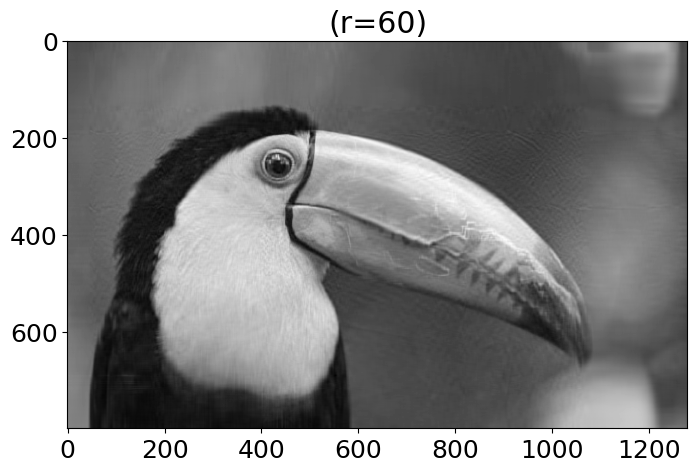

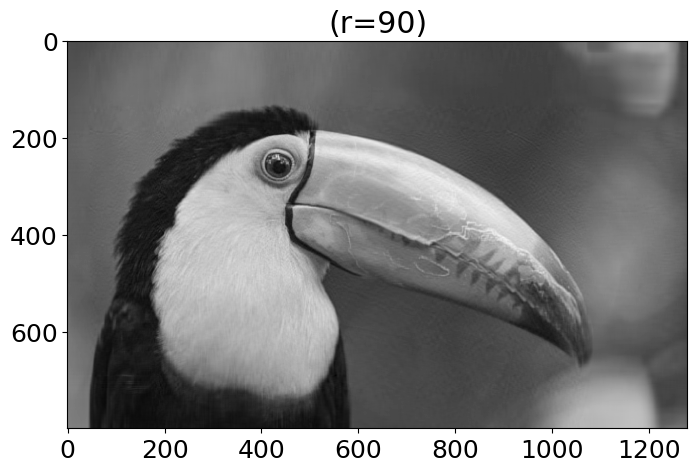

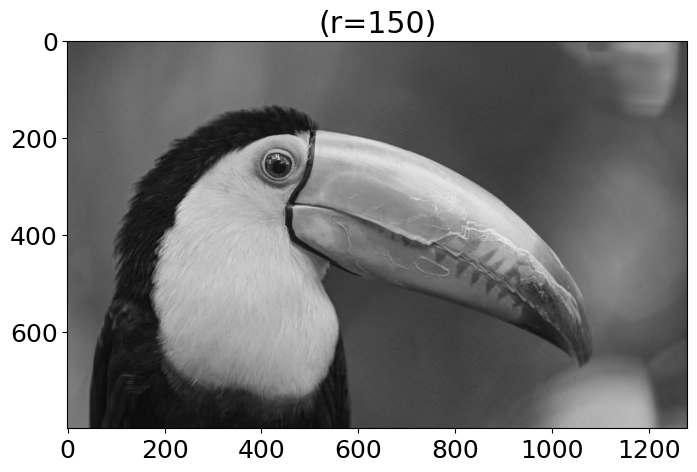

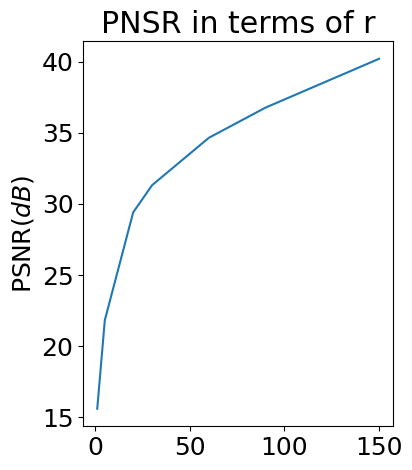

In [33]:
##Your Code start here
import numpy as np
import cv2
import matplotlib.pyplot as plt

pic = cv2.imread('pic.jpg', cv2.IMREAD_GRAYSCALE) 

def SVDAPX(M,r):
  U,S,V = np.linalg.svd(M, full_matrices=False)
  return np.dot(U[:, :r], np.dot(np.diag(S[:r]), V[:r, :])) 

def PNSRC(M,A):
  mseM = (np.square(M - A)).mean(axis=None)
  maxM = np.max(M) 
  return 10*np.log10((maxM**2)/mseM) 
r = [1, 5, 20, 30, 60, 90, 150]
PNSRArr = []
ims = []
for i in range(len(r)):
  ims.append(SVDAPX(pic,r[i])) 
  PNSRArr.append(PNSRC(pic,ims[i])) 


plt.figure(figsize=[8,14])
plt.title("Original Image")
plt.imshow(pic,cmap='gray')

plt.figure(figsize=[8,14])
plt.title('(r=1)')
plt.imshow(ims[0],cmap='gray') 

plt.figure(figsize=[8,14])
plt.title('(r=5)')
plt.imshow(ims[1],cmap='gray') 

plt.figure(figsize=[8,14])
plt.title('(r=20)')
plt.imshow(ims[2],cmap='gray') 

plt.figure(figsize=[8,14])
plt.title('(r=30)')
plt.imshow(ims[3],cmap='gray') 

plt.figure(figsize=[8,14])
plt.title('(r=60)')
plt.imshow(ims[4],cmap='gray') 

plt.figure(figsize=[8,14])
plt.title('(r=90)')
plt.imshow(ims[5],cmap='gray') 

plt.figure(figsize=[8,14])
plt.title('(r=150)')
plt.imshow(ims[6],cmap='gray') 

plt.figure(figsize=[4,5])
plt.title(r'PNSR in terms of r')
plt.plot(r,PNSRArr) 
plt.ylabel(r'PSNR($dB$)')

plt.show() # display the plot

##Your Code ends here

###  part 2

Another issue that we can explore with a similar idea of applying base transform is removing noise from images. In the condition that the noise in the image is uniform and in such a way that it does not distort the general information in the image. from the point of view of SVD, according to the examination of the general information, the direction of the image vector on bases with larger singular values has not changed much, and removing the information related to Examining general information to vectors with less importance can remove noise and keep the main information of the image.
In this part, add two different noises salt and pepper and Gaussian noise with a desired and appropriate range to the image pic.jpg so that the PSNR of both images is in the same range, then perform the noise reduction process with the help of SVD analysis.
For both noises, draw the PSNR diagram in terms of different r.
  Then compare the results with the graph by plotting a number of outputs.
  Which of the noises is more effective in this method?


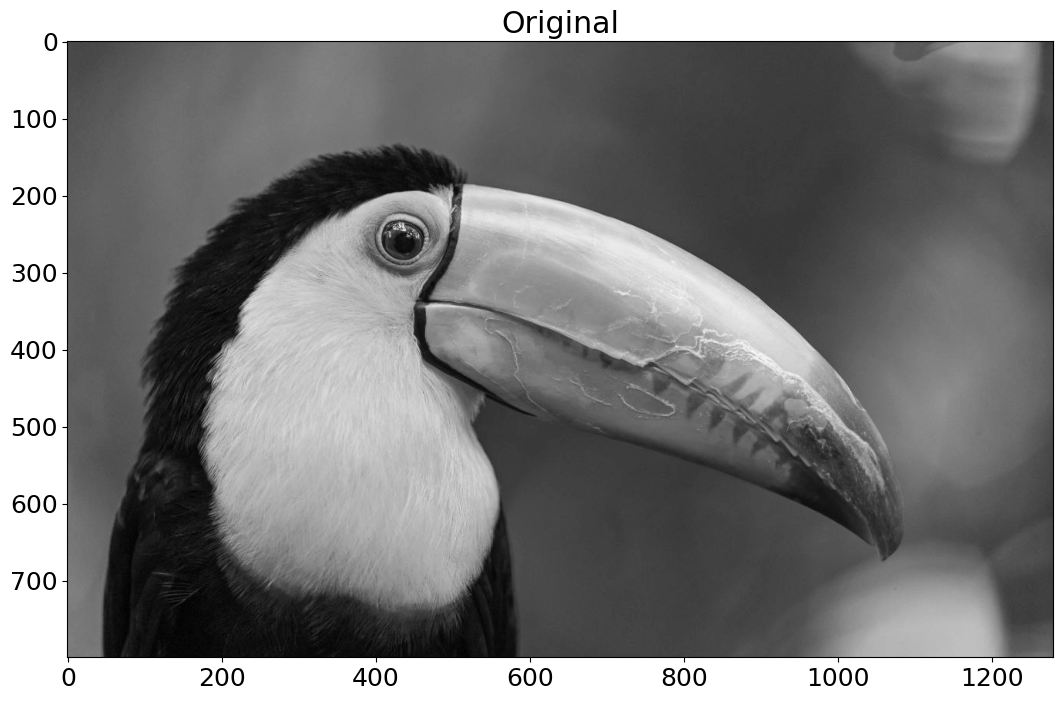

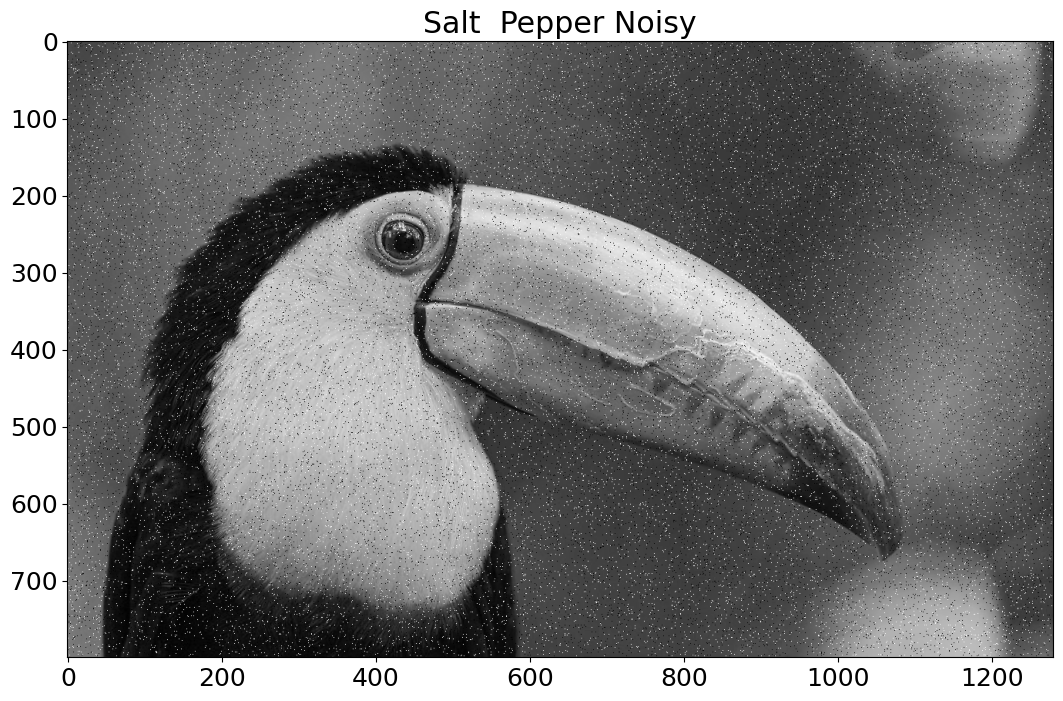

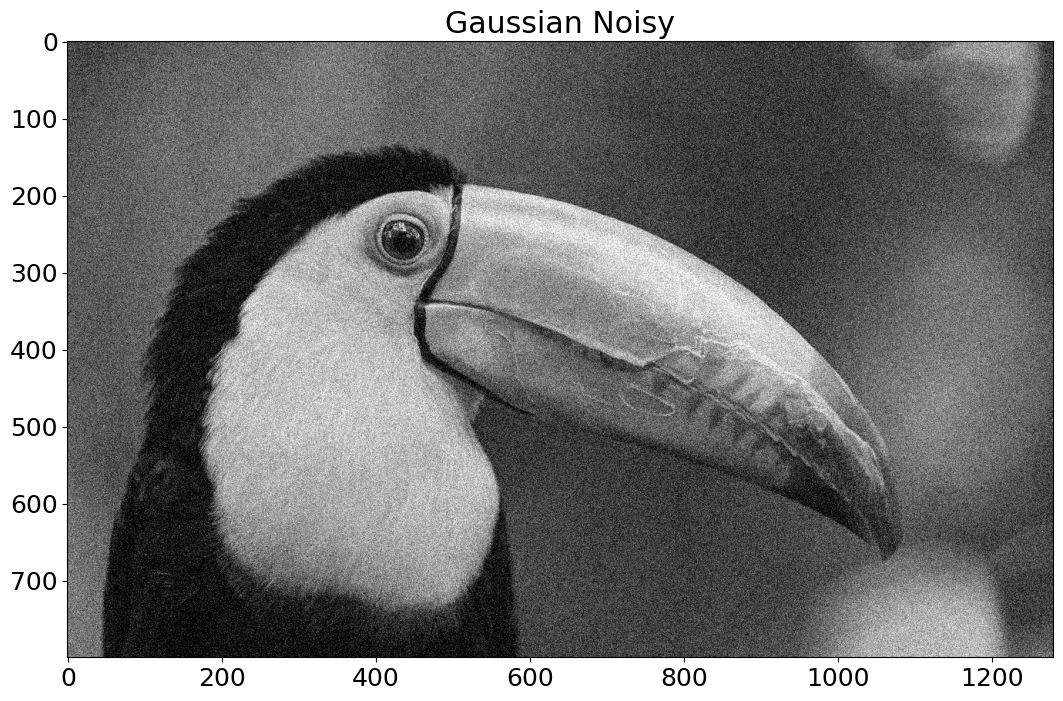

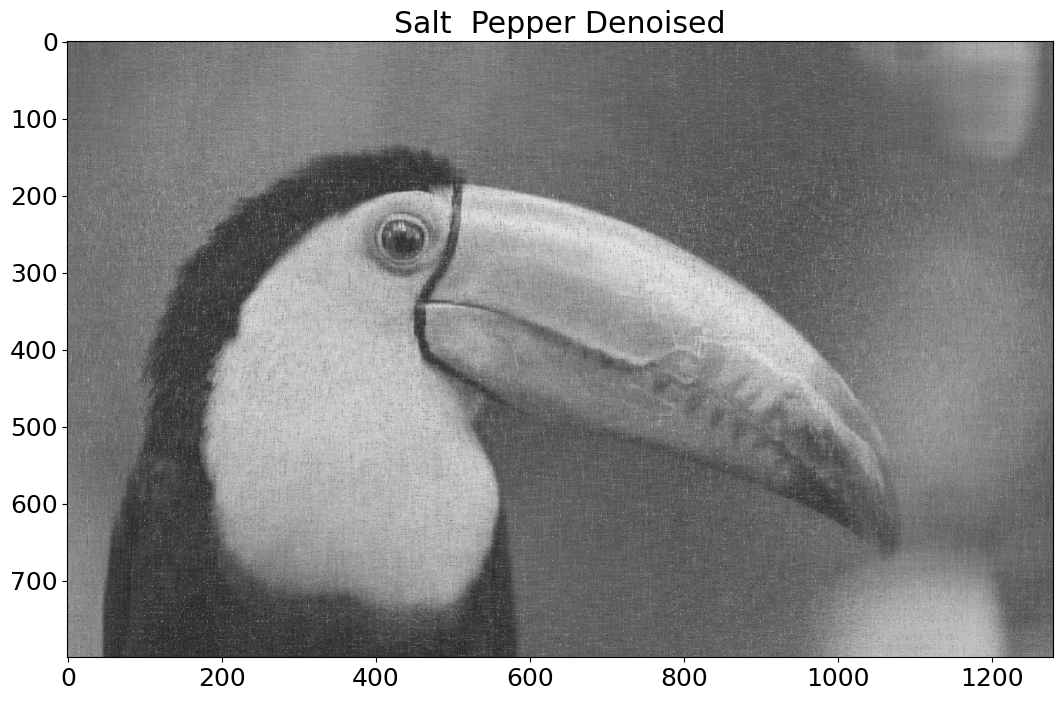

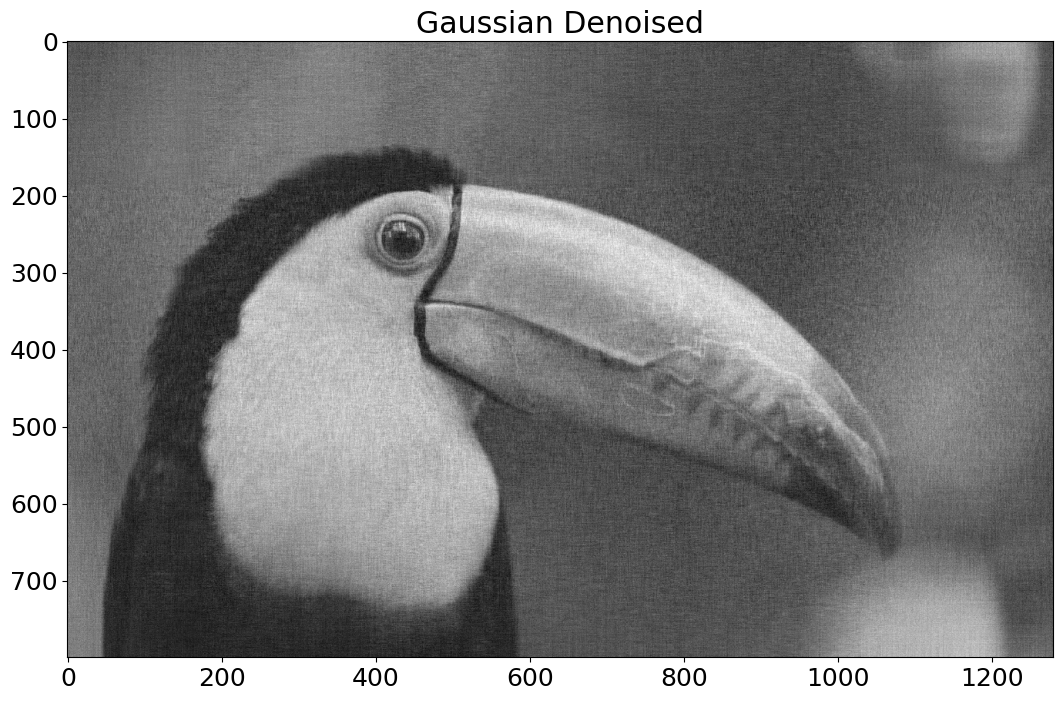

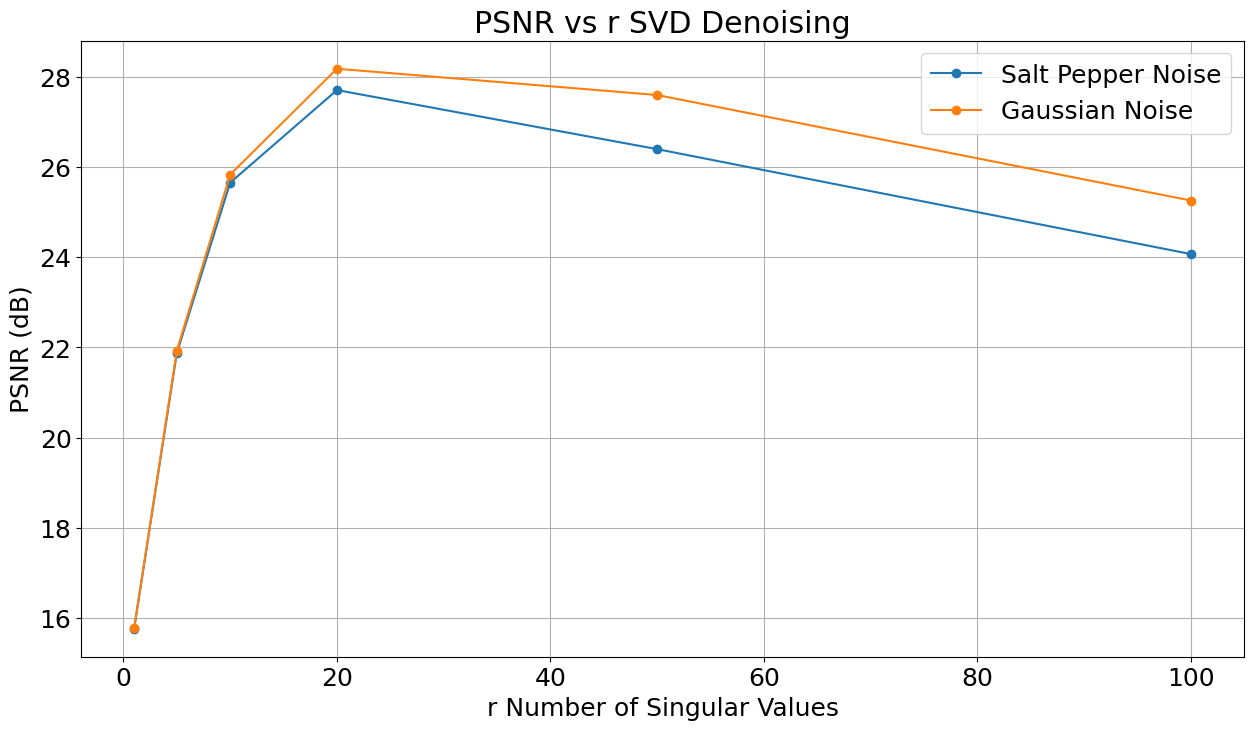

In [40]:
##Your Code start here
import cv2
import numpy as np
import matplotlib.pyplot as plt


def add_gaussian_noise(image, mean, std_dev):
    noisy_image = image + np.random.normal(mean, std_dev, image.shape)
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def read_grayscale_image(file_path):
    return cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

def denoise_image_svd(noisy_image, r_values):
    psnr_values = []
    reconstructed_images = []

    for r in r_values:
        U, Sigma, Vt = np.linalg.svd(noisy_image, full_matrices=False)
        reconstructed_image = np.dot(U[:, :r], np.dot(np.diag(Sigma[:r]), Vt[:r, :]))
        mse = np.mean((original_image - reconstructed_image) ** 2)
        psnr_values.append(20 * np.log10(255 / np.sqrt(mse)))
        reconstructed_images.append(reconstructed_image)

    return psnr_values, reconstructed_images


def add_salt_and_pepper_noise(image, salt_prob, pepper_prob):
    noisy_image = image.copy()
    total_pixels = image.size

    num_salt = np.ceil(salt_prob * total_pixels)
    salt_coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[salt_coords[0], salt_coords[1]] = 255

    num_pepper = np.ceil(pepper_prob * total_pixels)
    pepper_coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[pepper_coords[0], pepper_coords[1]] = 0

    return noisy_image

file_path = 'pic.jpg'
original_image = read_grayscale_image(file_path)

salt_prob = 0.02
pepper_prob = 0.02
gaussian_mean = 0
gaussian_std_dev = 25

salt_pepper_noisy_image = add_salt_and_pepper_noise(original_image, salt_prob, pepper_prob)

gaussian_noisy_image = add_gaussian_noise(original_image, gaussian_mean, gaussian_std_dev)

r_values = [1, 5, 10, 20, 50, 100]

psnr_salt_pepper, reconstructed_images_salt_pepper = denoise_image_svd(salt_pepper_noisy_image, r_values)

psnr_gaussian, reconstructed_images_gaussian = denoise_image_svd(gaussian_noisy_image, r_values)




plt.figure(figsize=(15, 8))
plt.imshow(original_image, cmap='gray')
plt.title('Original')

plt.figure(figsize=(15, 8))
plt.imshow(salt_pepper_noisy_image, cmap='gray')
plt.title('Salt  Pepper Noisy')

plt.figure(figsize=(15, 8))
plt.imshow(gaussian_noisy_image, cmap='gray')
plt.title('Gaussian Noisy')

plt.figure(figsize=(15, 8))
plt.imshow(reconstructed_images_salt_pepper[-1], cmap='gray')  
plt.title('Salt  Pepper Denoised')

plt.figure(figsize=(15, 8))
plt.imshow(reconstructed_images_gaussian[-1], cmap='gray')  
plt.title('Gaussian Denoised')

plt.figure(figsize=(15, 8))
plt.plot(r_values, psnr_salt_pepper, marker='o', label='Salt Pepper Noise')
plt.plot(r_values, psnr_gaussian, marker='o', label='Gaussian Noise')
plt.title('PSNR vs r SVD Denoising')
plt.xlabel('r Number of Singular Values')
plt.ylabel('PSNR (dB)')
plt.legend()
plt.grid(True)
plt.show()

##Your Code ends here

##  Q3. PCA and Clustering <sub><sup>``(40 pt.)``</sup></sub>
In this problem we want to cluster some data points.
But first, you should reduce the number of features by the PCA algorithm then use kmeans clustering algorithm

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA

### Import Dataset

In [61]:
Datapoint = pd.read_csv('Datapoint.csv')


### Correlation Heatmap

In this part plot the correlation Heatmap of features.
what is your suggestion about the number of principal components that they have high variance? Explain why.

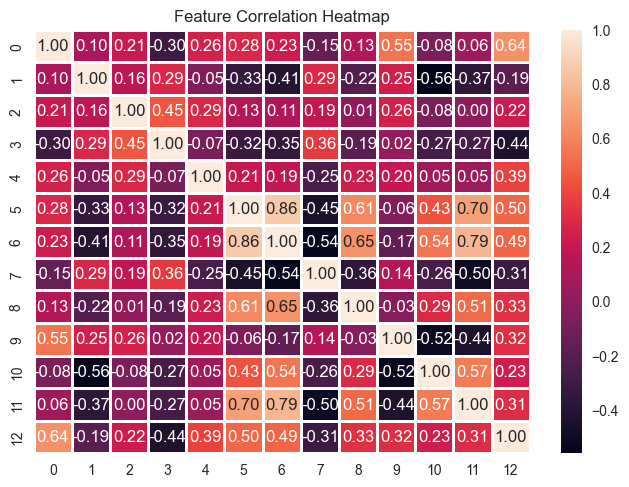

In [62]:
##Your Code start here
data = np.corrcoef(Datapoint, rowvar=False)

sns.heatmap(data, annot=True, fmt=".2f", linewidths=1)
plt.title('Feature Correlation Heatmap')
plt.show()
##Your Code ends here

###  Data Preprocessing

In [94]:
Datapoint.head()

14.23  1.71  2.43  15.6  127   2.8  3.06  0.28  2.29  5.64  1.04  3.92  \
0  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
2  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
3  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   
4  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97  6.75  1.05  2.85   

   1065  
0  1050  
1  1185  
2  1480  
3   735  
4  1450

### PCA (Principal Component Analysis)
> As you know for applying PCA we should scale our data points.Here we use MinMax and Standard Scaler.
(First, use Standard Scaler)

Calculate principal components and plot Explained variance by each component.

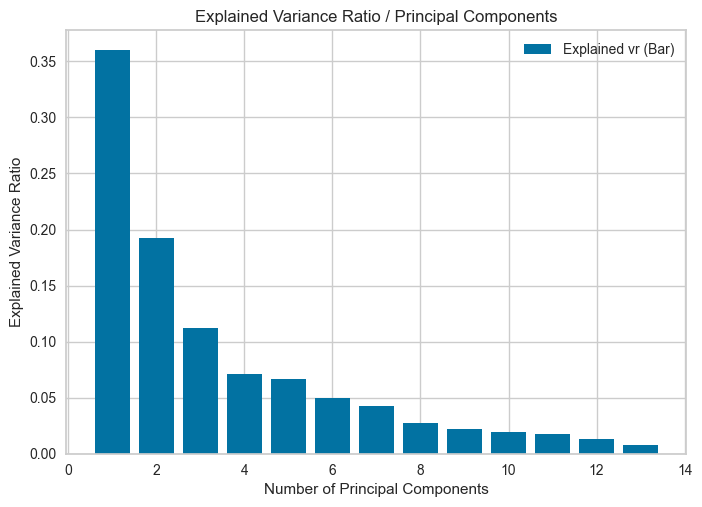

In [116]:
##Your Code start here
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datapoint)
COV = np.cov(scaled_data, rowvar=False)

eigval, eigvec = np.linalg.eig(COV)

index = np.argsort(eigval)[::-1]
eigval = eigval[index]
eigvec = eigvec[:, index]

explained_vr = eigval/np.sum(eigval)


plt.bar(range(1, len(explained_vr) + 1), explained_vr,  label='Explained vr (Bar)')
plt.title('Explained Variance Ratio / Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()
#Your Code ends here


Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [161]:
##Your Code start here
CVR = np.cumsum(explained_vr)
th = 0.9
num = np.argmax(CVR >= th) + 1

reduData = np.dot(scaled_data, eigvec[:, :num])
standard = (Datapoint - np.mean(Datapoint, axis=0)) / np.std(Datapoint, axis=0)

COV = np.cov(standard, rowvar=False)
eigval, eigvec = np.linalg.eigh(COV)

index = np.argsort(eigval)[::-1]
eigval = eigval[index]
eigvec = eigvec[:,index]
bigEig=eigvec[:, :num]
pca_std_datapoint = np.dot(standard, bigEig)
##Your Code ends here


### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

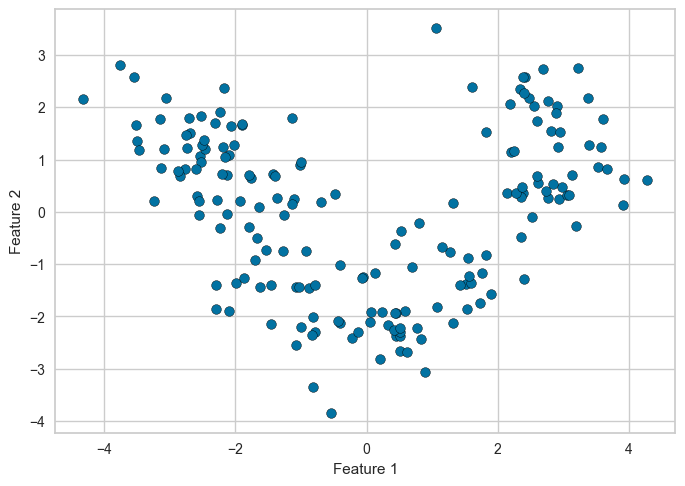

In [164]:
##Your Code start here
plt.scatter(pca_std_datapoint[:, 0], (-1)*pca_std_datapoint[:, 1], edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
##Your Code ends here

### Do all previous steps for MinMax Scaling
Tell your opinion about diffrences.




Calculate principal components and plot Explained variance by each component.

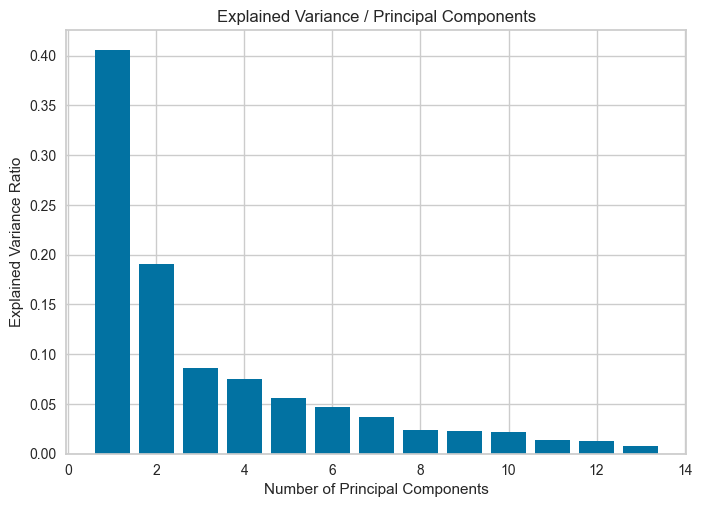

In [165]:
##Your Code start here
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(Datapoint)
COV = np.cov(scaled_data, rowvar=False)

eigval, eigvec = np.linalg.eig(COV)

index = np.argsort(eigval)[::-1]
eigval = eigval[index]
eigvec = eigvec[:, index]

explained_vr = eigval/np.sum(eigval)


plt.bar(range(1, len(explained_vr) + 1), explained_vr,  label='Explained vr (Bar)')
plt.title('Explained Variance / Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.grid(True)
plt.show()
##Your Code ends here


Apply PCA Algorithm from scratch and reduce the number of features to the number you have guessed in previous parts.

In [128]:
##Your Code start here
cov_matrix = np.cov(scaled_data.T)
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs.sort(reverse=True)

k = 11
top_eigvecs = np.array([eig_pairs[i][1] for i in range(k)])
new_data_minmax = np.dot(scaled_data, top_eigvecs.T)
##Your Code ends here

### PCA plot in 2D
Plot data points using their two first features.What do you think about the number of clusters?

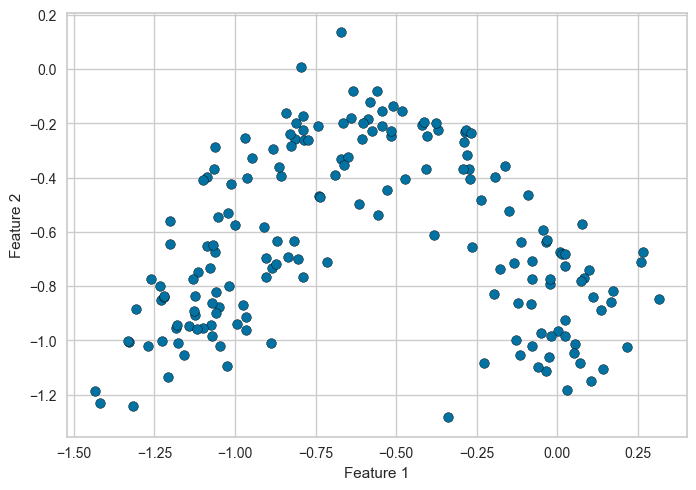

In [132]:
##Your Code start here
plt.scatter(new_data_minmax[:, 0],(-1)*new_data_minmax[:, 1], edgecolors='black')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
##Your Code ends here

In [ ]:
###1.Range of values:
#### MinMaxScaler scales the data to a fixed range, typically between 0 and 1, while StandardScaler standardizes the data by removing the mean and scaling to unit variance.
#### MinMaxScaler is useful when the range of the data is known and fixed, while StandardScaler is useful when the data is normally distributed.

###2.Interpretability:
#### MinMaxScaler preserves the original scale of t1he data, while StandardScaler transforms the data to have a mean of 0 and a standard deviation of 1.

###3.Impact on Outliers:
####MinMax Scaling: Can be affected by outliers, as they can change the minimum and maximum values and reduce the range of the scaled data. This can lead to loss of information and lower variance.
####Standard Scaling: Less influenced by outliers, as it uses the mean and standard deviation, which are less sensitive to extreme values. This can preserve more information and higher variance.

###4.Algorithm Sensitivity:
####MinMax Scaling: Recommended for algorithms that depend on distances or gradients, such as k-nearest neighbors, gradient descent, or neural networks. These algorithms can perform better when the features are scaled to the same range and have similar magnitudes.
####Standard Scaling: Generally a safe option for various algorithms, especially those that assume a normal or Gaussian distribution of features, such as linear regression, logistic regression, or support vector machines. These algorithms can benefit from having the features standardized to have zero mean and unit variance.



### KMeans Clustering
#### Elbow Method for Determining Cluster Amount on  Dataset

Using the elbow method to find the optimal number of clusters

100%|██████████| 8/8 [00:00<00:00, 24.38it/s]


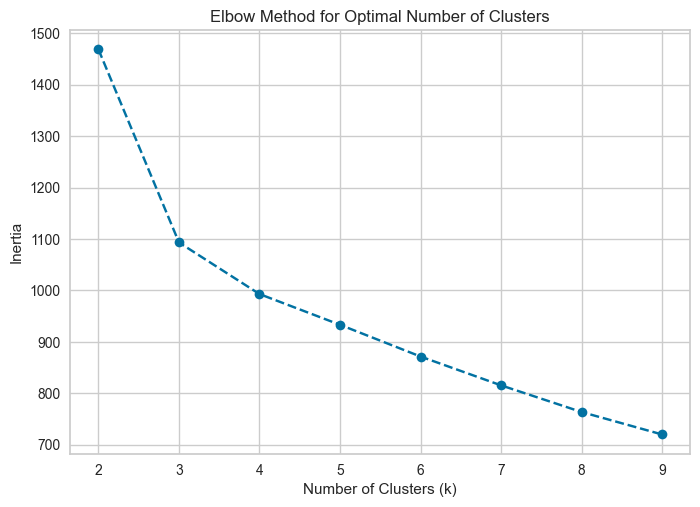

In [166]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)
plt.plot(range(2,10), inertia, marker = 'o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
##Your Code ends here

What is inertia and silhouette metrics?
Explain them briefly.




**Inertia:**
-In the context of clustering, inertia is a metric used to evaluate the goodness of fit of a clustering algorithm. It is calculated as the sum of squared distances between each data point and the centroid of its assigned cluster. Inertia measures how internally coherent the clusters are; lower inertia values indicate that the clusters are more tightly bound. However, inertia alone is not sufficient to determine the optimal number of clusters, as it tends to decrease as the number of clusters increases. Therefore, it is often used in conjunction with other metrics, such as the silhouette score, to identify the appropriate number of clusters.

**Silhouette Score:**
-The silhouette score is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). It quantifies the quality of the clusters by considering the distance between data points and the separation between clusters. The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. A value close to 1 implies that the data point is appropriately clustered, while a value close to -1 suggests that the data point may be misclustered. The silhouette score is a useful metric for assessing the appropriateness of the clustering configuration and can help in determining the optimal number of clusters.

In [167]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    inertia.append(kmeans.inertia_)


100%|██████████| 8/8 [00:00<00:00, 28.18it/s]


In [168]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(pca_std_datapoint)
    silhouette[i] = sil(pca_std_datapoint, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 23.72it/s]


Plot the **inertia** and **silhouette ** values

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

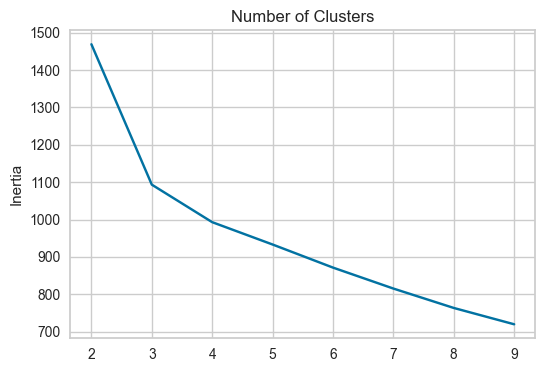

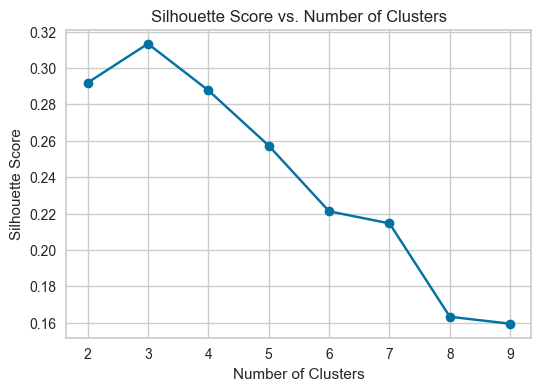

In [169]:
##Your Code start here
plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), inertia)
plt.title('Number of Clusters')
plt.ylabel('Inertia')

plt.figure(figsize=(6, 4))
plt.plot(silhouette.keys(), silhouette.values(), marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
##Your Code ends here

Tune the hyper parameters based on your conclusions.

In [198]:
k = 3
model_kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(pca_std_datapoint)


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


#Now plot the datapoints usig two first features
(Each cluster in a different colour)

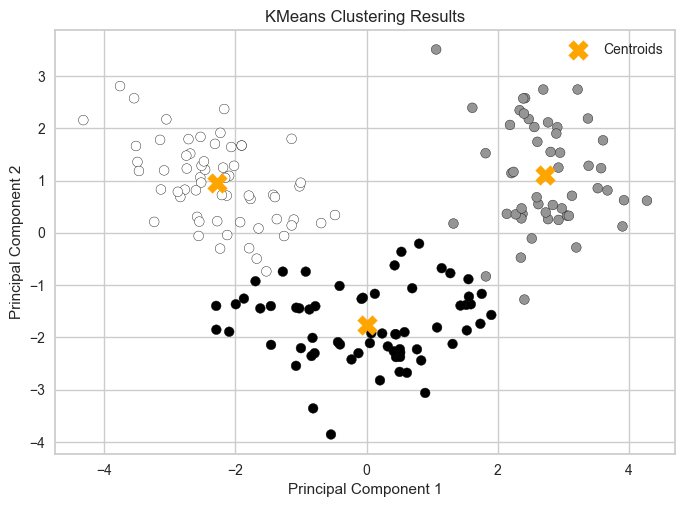

In [199]:
# Scatter plot of data points colored by cluster assignment with different colors
plt.scatter(pca_std_datapoint[:, 0], (-1)*pca_std_datapoint[:, 1], c=y_predict_kmeans, edgecolors='k')

# Plot centroids with a different color
plt.scatter(model_kmeans.cluster_centers_[:, 0], (-1)*model_kmeans.cluster_centers_[:, 1], marker='X', s=200, color='orange', label='Centroids')

# Chart details
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

Do all previous steps for MinMax scaled data points.





100%|██████████| 8/8 [00:00<00:00, 28.21it/s]


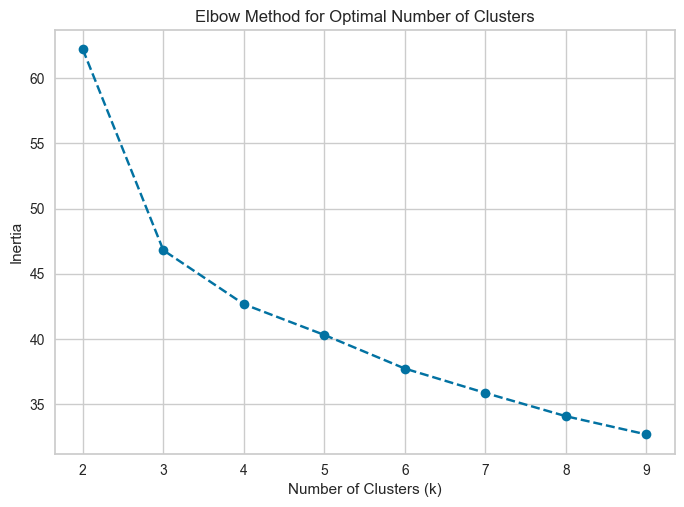

In [179]:
##Your Code ends here
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(new_data_minmax)
    inertia.append(kmeans.inertia_)
plt.plot(range(2,10), inertia, marker = 'o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
##Your Code ends here

In [181]:
#You should save your final datapoints in pca_std_datapoint variable
inertia = []
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter= 500, random_state=17)
    kmeans.fit(new_data_minmax)
    inertia.append(kmeans.inertia_)

100%|██████████| 8/8 [00:00<00:00, 28.92it/s]


In [182]:
silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=15, max_iter=500, random_state=17)
    kmeans.fit(new_data_minmax)
    silhouette[i] = sil(new_data_minmax, kmeans.labels_, metric='euclidean')

100%|██████████| 8/8 [00:00<00:00, 28.59it/s]


Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

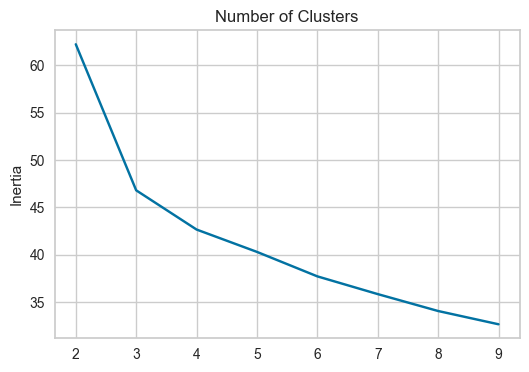

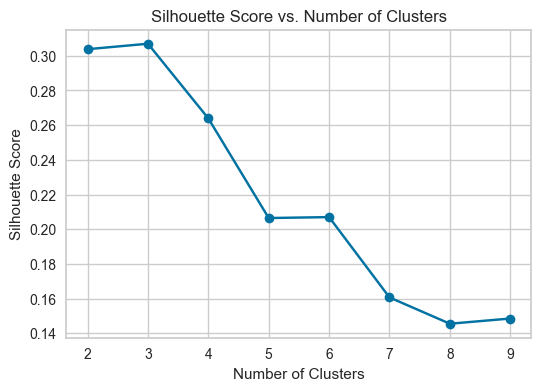

In [183]:
##Your Code start here
plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), inertia)
plt.title('Number of Clusters')
plt.ylabel('Inertia')

plt.figure(figsize=(6, 4))
plt.plot(silhouette.keys(), silhouette.values(), marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
##Your Code ends here

In [203]:
k = 3
model_kmeans = KMeans(n_clusters=k, random_state=0, init='k-means++')
y_predict_kmeans = model_kmeans.fit_predict(new_data_minmax)

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


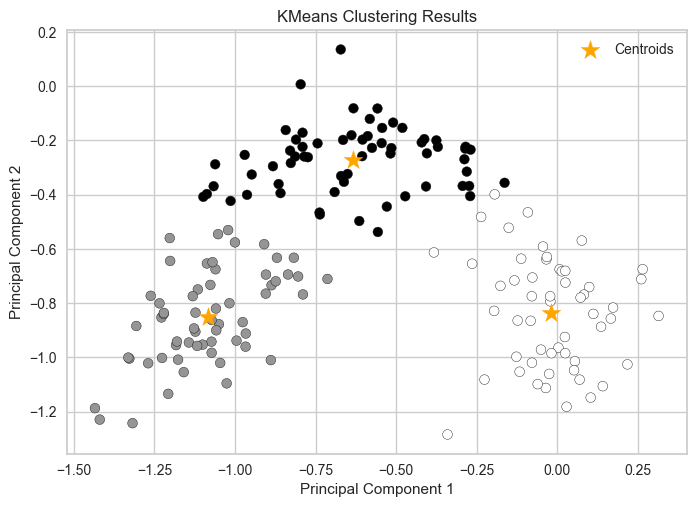

In [206]:
# Scatter plot of data points colored by cluster assignment with different colors
plt.scatter(new_data_minmax[:, 0], (-1)*new_data_minmax[:, 1], c=y_predict_kmeans, edgecolors='k')

# Plot centroids with a different color
plt.scatter(model_kmeans.cluster_centers_[:, 0], (-1)*model_kmeans.cluster_centers_[:, 1], marker='*', s=200, color='orange', label='Centroids')

# Chart details
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

Compare the results of different scaling methods in a PCA problem

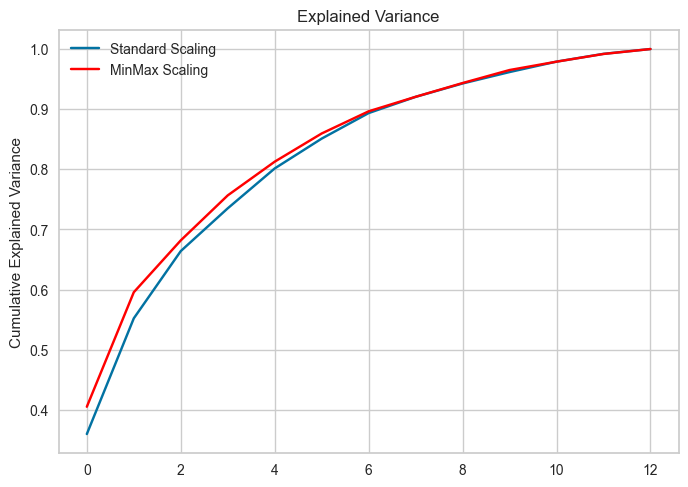

In [209]:
SDSS = StandardScaler().fit_transform(Datapoint)
PCASS = PCA().fit_transform(SDSS)
SDMM = MinMaxScaler().fit_transform(Datapoint)
PCAMM = PCA().fit_transform(SDMM)
plt.plot(np.cumsum(PCAS.explained_variance_ratio_), label='Standard Scaling')
plt.plot(np.cumsum(PCAM.explained_variance_ratio_), label='MinMax Scaling',color='red')
plt.title('Explained Variance')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)

plt.show()

The choice of scaling method can have a significant impact on the results of a PCA problem. Here's a summary of the findings from the search results:
1. StandardScaler:
In one example, StandardScaler gave the highest performance (AUC-ROC) on a Kaggle dataset.
In another example, StandardScaler achieved the best scores in only 4 out of 16 cases.
StandardScaler is suitable for algorithms that assume that the data is normally distributed, such as linear regression, logistic regression, and linear discriminant analysis.

2. MinMaxScaler:
In one example, MinMaxScaler gave the highest performance (AUC-ROC) on a Kaggle dataset.
In another example, MinMaxScaler achieved the best scores in only 1 out of 16 cases.
MinMaxScaler is suitable for algorithms that require features to be on a similar scale, such as neural networks.
